* Fitting a line to data points
* Fitting arbitrary curves to data points
* Testing performance of regression algorithms
* Applying regression to real-word data

# Regression
is a study of **how to best fit a curve to summarize data**.

有一函式 f 其中一個輸入有對應的一個/多個輸出(如：y=2x, y=3x)

這樣形式的函式集合是我們的模型 M:
    
    M(w)= {y = wx | w∈R}
    
找到一組最佳的參數 w* 使得 M(w*) 這條線，能擬合我們的資料分佈，這就是 Regression algorithm 要做的事情。

* Input 可以是 離散 或是 連續值
* Ouput 必須是 連續值!

### Measure the success of LRN algorithm

* 須將資料分作「訓練集」和「測試集」
* Variance - 擬合曲線起落的好壞程度，表示訓練資料對預測結果的影響(variance 小，敏感度小)。
* Bias - 指出擬合曲線距離 ground-truth 有多遠？

|Training set|Testing set|Result|術語|Explain|
|---|---|---|---|---|
|表現優👍|表現差👎|表現差👎| Overfit | LRN algorithm 得出的曲線可以完全擬合資料上的每一點。|
|表現差👎|表現差👎|表現差👎| Underfit | 預測未曾見過的測試集資料表現好一些，訓練集資料表現差 |
|表現優👍|表現優👍|表現優👍| Ideal | 理想狀況，無論在訓練或是測試集資料上表現都好|

## Linear regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

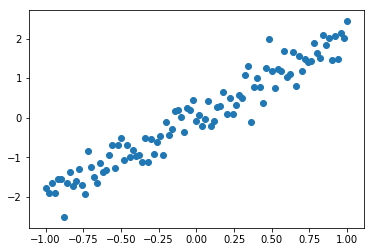

In [15]:
x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

plt.scatter(x_train, y_train)

上述隨機產生數值點後，我們要透過演算法擬合出一條接近此資料集的線(y = wx)。這意味著我們要計算一個 cost function，找出讓 cost 最小的 w 參數。(透過 model 與 ideal 之間距離最小，來計算)

$w^*$= arg $min_w$  cost($Y_{model}, Y_{ideal}$)

其中 $Y_{model} = M(w, X)$, 

 因此 cost($Y_{model}, Y_{ideal}$) 
 
 = $|Y_{model} - Y_{ideal}|$ 
 
 = $|M(w, X) - Y_{ideal}|$

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
learning_rate = 0.01
training_epochs = 100

x_train = np.linspace(-1, 1, 101)
y_train = 2* x_train + np.random.randn(*x_train.shape) * 0.33

In [3]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X, w):
    return tf.multiply(X, w)    # y = w*X

w = tf.Variable(0.0, name='weights')

y_model = model(X, w)
cost = tf.square(Y - y_model)

In [4]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [5]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [6]:
for epoch in range(training_epochs):
    for x,y in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X: x, Y: y})

w_star = sess.run(w)  # Get the final w
w_star

1.9468575

In [ ]:
sess.close()

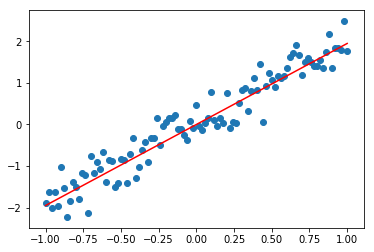

In [9]:
plt.scatter(x_train, y_train)
y_learned = x_train * w_star
plt.plot(x_train, y_learned, 'r')

如上圖紅線所示，我們已經使用 Tensorflow 解出 linear regression 問題，得出一條擬合曲線

#### 進階：加入 bias 來改進

1.9190886 0.056671605


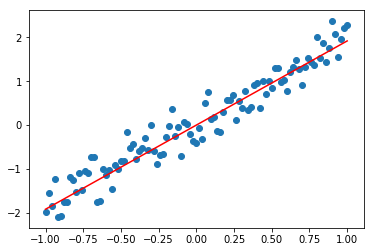

In [3]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X, w, b):
    return tf.multiply(X, w) + b    ##### y = w*X + bias

w = tf.Variable(0.0, name='weights')
b = tf.Variable(1.0, name='bias')    ###

y_model = model(X, w, b)  #########
cost = tf.square(Y - y_model)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for x,y in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X: x, Y: y})

w_star = sess.run(w)  # Get the final w
b_star = sess.run(b)   #############
print(w_star, b_star)

sess.close()

plt.scatter(x_train, y_train)
y_learned = x_train * w_star
plt.plot(x_train, y_learned, 'r')